# 1. Importing Libraries & Load data

Importing libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

Reading data

In [110]:
data0 = pd.read_csv('application_data.csv')
data1 = pd.read_csv('previous_application.csv')
des = pd.read_csv('columns_description.csv')

In [111]:
data0.shape, data1.shape, des.shape

((307511, 122), (1670214, 37), (160, 5))

In [112]:
#statistical summary of numerical variables
data0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# 2. Data Cleaning 

# 2.1 Application data

## Handling Missing values

In [113]:
#changing the column names to lower-case for convinience
data0.columns = data0.columns.astype('str').map(lambda x: x.lower())

In [114]:
#list of columns with values missing
s=0
for i in data0.columns:
    if (data0[i].isna().sum()>0):
        s=s+1
        print("Feature",i,"has",data0[i].isna().sum(),"missing values.")  
        print('---'*20)
print(s)

Feature amt_annuity has 12 missing values.
------------------------------------------------------------
Feature amt_goods_price has 278 missing values.
------------------------------------------------------------
Feature name_type_suite has 1292 missing values.
------------------------------------------------------------
Feature own_car_age has 202929 missing values.
------------------------------------------------------------
Feature occupation_type has 96391 missing values.
------------------------------------------------------------
Feature cnt_fam_members has 2 missing values.
------------------------------------------------------------
Feature ext_source_1 has 173378 missing values.
------------------------------------------------------------
Feature ext_source_2 has 660 missing values.
------------------------------------------------------------
Feature ext_source_3 has 60965 missing values.
------------------------------------------------------------
Feature apartments_avg has 1

In [115]:
#number of columns with more than 40% missing values
missing_col1 = [col for col in data0.columns if data0[col].isna().sum()/data0.shape[0] > 0.4]
len(missing_col1)

49

In [116]:
#dropping columns with more than 40% missing values
data0.drop(missing_col1, axis = 1, inplace = True)

In [117]:
#shape of dataframe upon dropping columns
data0.shape

(307511, 73)

In [118]:
#new list of columns with missing value
missing_col2 = [col for col in data0.columns if data0[col].isna().sum() > 0]

In [119]:
#information about the columns with missing values
data0[missing_col2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   amt_annuity                 307499 non-null  float64
 1   amt_goods_price             307233 non-null  float64
 2   name_type_suite             306219 non-null  object 
 3   occupation_type             211120 non-null  object 
 4   cnt_fam_members             307509 non-null  float64
 5   ext_source_2                306851 non-null  float64
 6   ext_source_3                246546 non-null  float64
 7   obs_30_cnt_social_circle    306490 non-null  float64
 8   def_30_cnt_social_circle    306490 non-null  float64
 9   obs_60_cnt_social_circle    306490 non-null  float64
 10  def_60_cnt_social_circle    306490 non-null  float64
 11  days_last_phone_change      307510 non-null  float64
 12  amt_req_credit_bureau_hour  265992 non-null  float64
 13  amt_req_credit

In [120]:
#checking number of missing values (column days_last_phone_change)
data0.days_last_phone_change.isnull().sum()

1

In [121]:
#checking number of missing values (column cnt_fam_members)
data0.cnt_fam_members.isnull().sum()

2

Droping data entries for which **'days_last_phone_change'** and **'cnt_fam_members'** values are missing as this count is insignificant.

In [122]:
#dropping corresponding rows
data0.dropna(subset = ['days_last_phone_change', 'cnt_fam_members'], inplace = True)

#### Inspecting other columns with missing values.

In [123]:
#imputing median
data0.amt_annuity.fillna(data0.amt_annuity.median(), inplace = True)
data0.amt_goods_price.fillna(data0.amt_goods_price.median(), inplace = True)
data0.ext_source_2.fillna(data0.ext_source_2.median(), inplace = True)
data0.ext_source_3.fillna(data0.ext_source_3.median(), inplace = True)

In [124]:
#imputing mode
data0.obs_30_cnt_social_circle.fillna(data0.obs_30_cnt_social_circle.mode()[0], inplace = True)
data0.def_30_cnt_social_circle.fillna(data0.def_30_cnt_social_circle.mode()[0], inplace = True)
data0.obs_60_cnt_social_circle.fillna(data0.obs_60_cnt_social_circle.mode()[0], inplace = True)
data0.def_60_cnt_social_circle.fillna(data0.def_60_cnt_social_circle.mode()[0], inplace = True)
data0.amt_req_credit_bureau_year.fillna(data0.amt_req_credit_bureau_year.mode()[0], inplace = True)
data0.amt_req_credit_bureau_qrt.fillna(data0.amt_req_credit_bureau_qrt.mode()[0], inplace = True)
data0.amt_req_credit_bureau_mon.fillna(data0.amt_req_credit_bureau_mon.mode()[0], inplace = True)
data0.amt_req_credit_bureau_week.fillna(data0.amt_req_credit_bureau_week.mode()[0], inplace = True)
data0.amt_req_credit_bureau_day.fillna(data0.amt_req_credit_bureau_day.mode()[0], inplace = True)
data0.amt_req_credit_bureau_hour.fillna(data0.amt_req_credit_bureau_hour.mode()[0], inplace = True)
data0.name_type_suite.fillna(data0.name_type_suite.mode()[0], inplace = True)

In [125]:
#Count of all the unique categories in occupation_type suit column
data0.occupation_type.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

In [126]:
#imputing missing values with top categories in existing ratio
s = data0.occupation_type.isna().sum()
data0.occupation_type.fillna(pd.Series(np.random.choice(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers'], 
                                              p = [0.37, 0.21, 0.18, 0.14, 0.10], size = s)), inplace = True)

## Inspecting Other columns, Fixing invalid values and Standardising values

In [127]:
#strictly categorical columns
data0.select_dtypes(exclude = ['float64', 'int64']).columns

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type'],
      dtype='object')

In [128]:
data0.code_gender.value_counts()

F      202447
M      105057
XNA         4
Name: code_gender, dtype: int64

In [129]:
#imputing missing values with genders in existing ratio
data0.code_gender.replace({'XNA': np.random.choice(['F','M'], p = [0.65,0.35])}, inplace = True)

In [130]:
data0.code_gender.value_counts()

F    202447
M    105061
Name: code_gender, dtype: int64

In [131]:
#unique value counts
data0.organization_type.value_counts(normalize = True)*100

Business Entity Type 3    22.110644
XNA                       18.007336
Self-employed             12.491382
Other                      5.425225
Medicine                   3.639905
Business Entity Type 2     3.431455
Government                 3.383327
School                     2.891957
Trade: type 7              2.546600
Kindergarten               2.237340
Construction               2.185634
Business Entity Type 1     1.945966
Transport: type 4          1.755401
Trade: type 3              1.135255
Industry: type 9           1.095256
Industry: type 3           1.065989
Security                   1.055907
Housing                    0.961926
Industry: type 11          0.879327
Military                   0.856563
Bank                       0.815263
Agriculture                0.798028
Police                     0.761281
Transport: type 2          0.716729
Postal                     0.701445
Security Ministries        0.641935
Trade: type 2              0.617870
Restaurant                 0

In [132]:
#replacing with NAN
data0.organization_type.replace({'XNA':np.nan}, inplace = True)

In [133]:
#integer and float columns
data0.select_dtypes(include = ['float64', 'int64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen

In [134]:
data0[[ 'days_birth', 'days_employed', 'days_registration', 'days_id_publish','days_last_phone_change']].describe()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change
count,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,-16037.041560,63815.673956,-4986.137584,-2994.208382,-962.860075
std,4363.980429,141276.312548,3522.896819,1509.449226,826.810973
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7480.000000,-4299.000000,-1570.000000
50%,-15750.000000,-1214.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [135]:
#converting to absolute value
data0.days_birth = data0.days_birth.apply(lambda x: abs(x))
data0.days_employed = data0.days_employed.apply(lambda x: abs(x))
data0.days_id_publish = data0.days_id_publish.apply(lambda x: abs(x))
data0.days_last_phone_change = data0.days_last_phone_change.apply(lambda x: abs(x))
data0.days_registration = data0.days_registration.apply(lambda x: abs(x))

To make these columns make more sense, we change the units from days to years.

In [136]:
#creating new columns with new unit - years
data0['years_birth'] = data0.days_birth.apply(lambda x: int(x/365))
data0['years_employed'] = data0.days_employed.apply(lambda x: int(x/365))

In [137]:
data0[['years_birth', 'years_employed']].describe()

,years_birth,years_employed
count,307508.000000,307508.000000
mean,43.436096,185.023316
std,11.954570,381.973621
min,20.000000,0.000000
25%,34.000000,2.000000
50%,43.000000,6.000000
75%,53.000000,15.000000
max,69.000000,1000.000000


## Handling Outliers

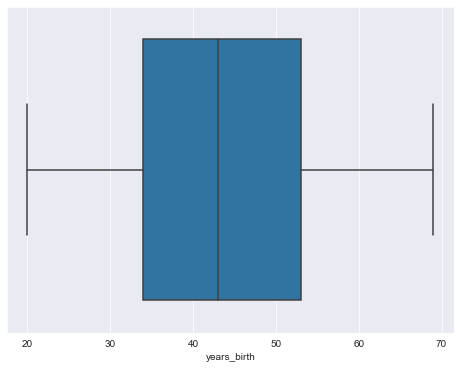

In [138]:
#Distribution of age of clients in years
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_birth)
plt.show()

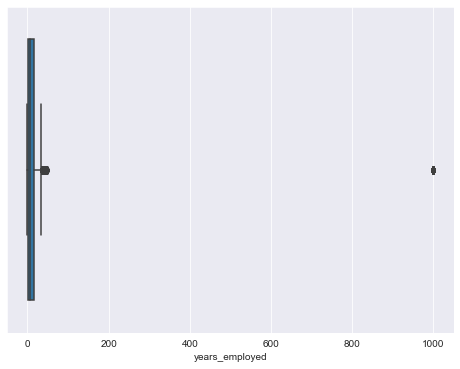

In [139]:
#distribution of number of years in current employment
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_employed)
plt.show()

In [140]:
#number of data points with years_employed > 100
data0[data0.years_employed > 100].shape[0]

55374

In [141]:
data0[data0.years_employed > 100].years_employed.describe()

count    55374.0
mean      1000.0
std          0.0
min       1000.0
25%       1000.0
50%       1000.0
75%       1000.0
max       1000.0
Name: years_employed, dtype: float64

There are around 18% values in year_employed that are equal to 1000. This looks like an error. 18% is a lot of rows, so we can replace it with NAN for now as it will not affect the analysis.

In [142]:
#replacing with NAN
data0.years_employed.replace({1000: np.nan}, inplace = True)

In [143]:
#sanity check
data0[data0.years_employed > data0.years_birth]

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed


In [144]:
data0[data0.amt_income_total > 5000000]

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762.0,3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,34,2.0
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,16425,8476,7276.0,1656,1,1,0,1,0,0,Managers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,0.504086,0.432962,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,23.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,19341,443,7414.0,2886,1,1,1,1,1,0,Laborers,2.0,2,2,TUESDAY,14,0,1,1,0,1,1,Transport: type 4,0.552838,0.495666,0.0,0.0,0.0,0.0,695.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0,52,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,15704,4961,3338.0,4728,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,0.535276,1.0,0.0,1.0,0.0,1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,43,13.0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,13551,280,3953.0,4972,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,0.535276,0.0,0.0,0.0,0.0,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,37,0.0


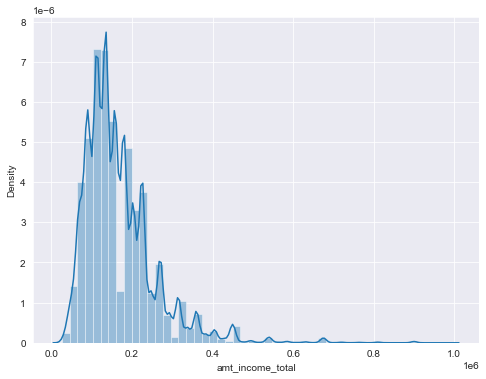

In [145]:
plt.figure(figsize = [8,6])
sns.distplot(data0.amt_income_total[data0.amt_income_total < 1000000])
plt.show()

In [146]:
#binning amt_income_total to keep the outlier in the analysis
L = [0, 0.05, 0.2, 0.35, 0.60, 0.75, 0.95, 1]
data0.amt_income_total.quantile(L)

0.00        25650.0
0.05        67500.0
0.20        99000.0
0.35       126000.0
0.60       162000.0
0.75       202500.0
0.95       337500.0
1.00    117000000.0
Name: amt_income_total, dtype: float64

In [147]:
#Binning Age, years employed, income into buckets(for future use) to make the distribustion more easy to understand
data0['age_group'] = pd.cut(data0.years_birth, [0,25,30,35,40,45,50,55,60,65,200], labels = ['<25','25-30','30-35','35-40','40-45',
                                                                                             '45-50','50-55','55-60','60-65','>65'])
data0['income_group'] = pd.qcut(data0.amt_income_total, q = L, labels = ['very-low', 'low','low-medium', 'medium',
                                                                         'high-medium', 'high', 'very-high'])

# 2.2 Previous_application data

In [148]:
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
#changing column names to lower-case for convinience
data1.columns = data1.columns.map(lambda x: str(x).lower())

In [150]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 non-nu

In [151]:
#Replacing 'XNA' and 'XAP' with NaN
data1.replace({'XNA':np.nan, 'XAP':np.nan}, inplace = True)

In [152]:
data1.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

# 2.3 Merging dataframes

In [153]:
#Hợp nhất các khung dữ liệu

In [154]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [155]:
#Merging all the attributes of current application data and previous application data on sk_id_curr
merged_data = pd.merge(data0, data1, on = 'sk_id_curr', how = 'inner')
merged_data.head()

,sk_id_curr,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed,age_group,income_group,sk_id_prev,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_down_payment,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite_y,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0,<25,high-medium,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,40-45,high,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,40-45,high,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5

In [156]:
#missing values
x = round(merged_data.isnull().sum()/merged_data.shape[0]*100, 2)
x[x > 0]

occupation_type              22.28
organization_type            19.35
years_employed               19.35
name_contract_type_y          0.02
amt_annuity_y                21.73
amt_down_payment             53.02
amt_goods_price_y            22.60
rate_down_payment            53.02
rate_interest_primary        99.66
rate_interest_privileged     99.66
name_cash_loan_purpose       95.80
name_payment_type            36.99
code_reject_reason           81.34
name_type_suite_y            49.14
name_client_type              0.11
name_goods_category          56.39
name_portfolio               21.73
name_product_type            63.67
name_seller_industry         50.60
cnt_payment                  21.73
name_yield_group             30.36
product_combination           0.02
days_first_drawing           39.69
days_first_due               39.69
days_last_due_1st_version    39.69
days_last_due                39.69
days_termination             39.69
nflag_insured_on_approval    39.69
dtype: float64

In [157]:
cols = [col for col in merged_data.columns if merged_data[col].isna().sum()/merged_data.shape[0] > 0.4]
merged_data.drop(cols, axis = 1, inplace = True)
merged_data.drop(['years_employed','years_birth'], axis = 1, inplace = True)

In [158]:
x = round(merged_data.isnull().sum()/merged_data.shape[0]*100, 2)
x[x > 0]

occupation_type              22.28
organization_type            19.35
name_contract_type_y          0.02
amt_annuity_y                21.73
amt_goods_price_y            22.60
name_payment_type            36.99
name_client_type              0.11
name_portfolio               21.73
cnt_payment                  21.73
name_yield_group             30.36
product_combination           0.02
days_first_drawing           39.69
days_first_due               39.69
days_last_due_1st_version    39.69
days_last_due                39.69
days_termination             39.69
nflag_insured_on_approval    39.69
dtype: float64

In [159]:
cols = ['occupation_type','organization_type','name_contract_type_y','name_payment_type', 'name_client_type', 
        'name_portfolio','name_yield_group', 'product_combination','nflag_insured_on_approval']
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].mode()[0])

In [160]:
cols = ['amt_annuity_y', 'amt_goods_price_y','amt_goods_price_y']
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].mean())

In [161]:
cols = ['cnt_payment', 'days_first_drawing', 'days_first_due', 'days_last_due_1st_version', 'days_last_due', 
        'days_termination',]
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].median())

In [162]:
#other remaining records with missing values are insignificant in number, we can drop them
merged_data.dropna(axis = 0, inplace = True)

In [163]:
#any missing values now?
merged_data.isna().any()

sk_id_curr                      False
target                          False
name_contract_type_x            False
code_gender                     False
flag_own_car                    False
flag_own_realty                 False
cnt_children                    False
amt_income_total                False
amt_credit_x                    False
amt_annuity_x                   False
amt_goods_price_x               False
name_type_suite_x               False
name_income_type                False
name_education_type             False
name_family_status              False
name_housing_type               False
region_population_relative      False
days_birth                      False
days_employed                   False
days_registration               False
days_id_publish                 False
flag_mobil                      False
flag_emp_phone                  False
flag_work_phone                 False
flag_cont_mobile                False
flag_phone                      False
flag_email  

# 3. Analysis

In [164]:
data0.target.value_counts()

0    282683
1     24825
Name: target, dtype: int64

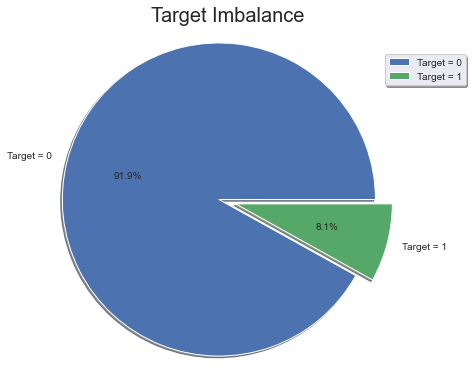

In [165]:
#Visualizing imabalance in the target variable
with plt.style.context('seaborn-deep'):
    explode = (0.1, 0.1)
    plt.pie(data0.target.value_counts(), labels = ['Target = 0','Target = 1'], explode = explode, radius = 1.8, autopct='%0.1f%%', shadow = True)
    plt.title('Target Imbalance', fontsize = 20, y = 1.3)
    plt.legend(bbox_to_anchor=(1.2, 1.2), fancybox=True, shadow=True)
    plt.show()

The imbalance in Target variable is apparent. 91.9% clients have no default histoy and 8.1% have default history.

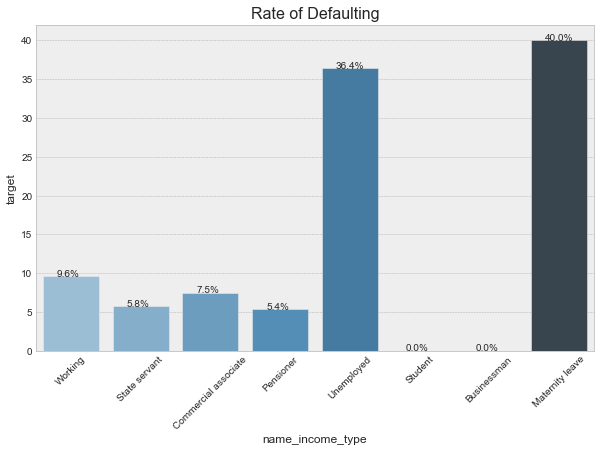

In [166]:
#tỷ lệ khách hàng có lịch sử nợ xấu trong từng loại nguồn thu nhập.
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.name_income_type, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 45)
#Với mỗi cột trên biểu đồ, chú thích với định dạng `'{:.1f}%'.format(k.get_height())` sẽ hiển thị tỉ lệ phần trăm khách hàng có khó khăn trong việc thanh toán nợ, với giá trị được làm tròn đến 1 chữ số sau dấu thập phân
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

In [167]:
#chia nhỏ DataFrame `data0` thành hai cái dựa trên biến mục tiêu:các mẫu KH khó khăn trong việc thanh toán khoản vay (T1) và các KH không có khó khăn trong việc thanh toán khoản vay (T0)
T0 = data0.loc[data0.target == 0]
T1 = data0.loc[data0.target == 1]

In [168]:
#Khai báo hàm 'cat_plot(x)' để vẽ biểu đồ đếm cho biến hạng mục nào đó, và sử dụng hai tập dữ liệu khác nhau (T1 và T0) để so sánh phân phối giá trị của biến hạng mục đó giữa hai nhóm khách hàng khác nhau
def cat_plot(x):
#Vẽ cột đầu tiên của biểu đồ: Với biến `x`,hiển thị phân bố giá trị giữa các nhóm khách hàng T0 bằng cách dùng `sns.countplot()`. `T0[x]` để lấy các giá trị của biến `x` trong T0
    plt.subplot(1,2,1)
#`palette='hls'` tạo màu, `order = T0 [x] .value_counts () .index` sắp xếp thứ tự hiển thị từ cao đến thấp.
    cnt1 = sns.countplot(T0[x], palette = 'hls', order = T0[x].value_counts().index)
    plt.xticks(rotation = 45) #quay trục
    cnt1.set_title('{} composition of Non-Defaulters'.format(x), fontsize = 16)
    for k in cnt1.patches: #thêm nhãn vị trí của biểu đồ, hiển thị phần trăm giá trị
        cnt1.annotate('{:.1f}%'.format(k.get_height()/T0.shape[0]*100),(k.get_x()+0.1, k.get_height()))
    plt.subplot(1,2,2) 
    cnt2 = sns.countplot(T1[x], palette = 'hls', order = T1[x].value_counts().index)
    plt.xticks(rotation = 45)
    cnt2.set_title('{} composition of Defaulters'.format(x), fontsize = 16)
    for k in cnt2.patches:
        cnt2.annotate('{:.1f}%'.format(k.get_height()/T1.shape[0]*100),(k.get_x()+0.2, k.get_height()))

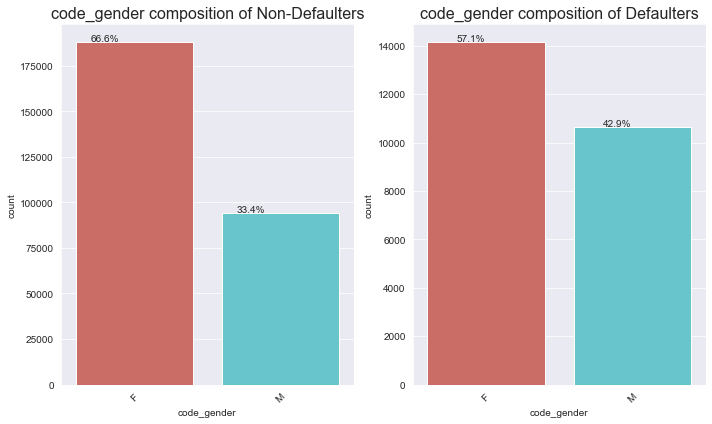

In [169]:
T1.code_gender.value_counts(normalize = True)*100
T0.code_gender.value_counts(normalize = True)*100
#phân bố giới tính trong hai nhóm (nhóm khách hàng có vấn đề về thanh toán khoản vay T1-Defaulters và nhóm không có vấn đề TO)
#chỗ output XNA thuật ngữ được sử dụng để ám chỉ những khoản vay không xác định được mục đích sử dụng hoặc không thể phân loại được vào bất kỳ danh mục vay mượn nào khác.
plt.figure(figsize = [10, 6]) 
cat_plot('code_gender')
plt.tight_layout()

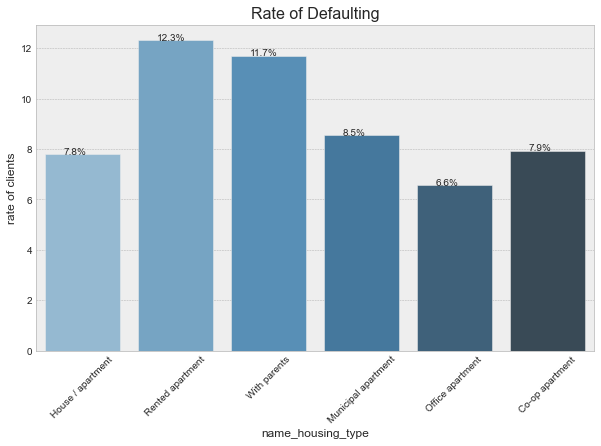

In [170]:
#tỉ lệ người nợ xấu thường sống ở đâu
with plt.style.context('bmh'):
    plt.figure(figsize=[10, 6])
    cnt = sns.barplot(data=data0, x='name_housing_type', y=data0.target * 100, palette='Blues_d', ci=False)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=45)
    cnt.set_ylabel('rate of clients', fontsize=12)

    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))
        
plt.show()

In [171]:
#hàm dùng để trực quan hóa các biến số (numerical variables) trong bộ dữ liệu bằng cách vẽ các biểu đồ kernel density (KDE) plot và box plot, giúp ta phân tích được phân bố và các giá trị ngoại lai (outlier) của các biến số
from numpy.core.fromnumeric import size
def num_plot(x):
    with sns.axes_style("whitegrid"):
#Hàm `GridSpec` để chia kích thước không gian của đồ thị thành 2 hàng 2 cột 
        G = plt.GridSpec(2, 2)
#ax1 là ô đầu tiên, chứa KDE plot của các giá trị `x` của những trường hợp mà giá trị target=0
        ax1 = plt.subplot(G[0,0])
        sns.distplot(T0[x], label = 'target = 0', color = 'tab:green')
        plt.title('Distribution plots of {}'.format(x), fontsize = 16)
        plt.legend(prop = {'size':16})
#ax2 là ô thứ hai, chứa KDE plot của các giá trị `x` của những trường hợp mà target =1.
        ax2 = plt.subplot(G[1,0], sharex = ax1, sharey = ax1)
        sns.distplot(T1[x], label = 'target = 1', color = 'sienna')
        plt.legend(prop = {'size':16})
        ax3 = plt.subplot(G[:,1])
#tham số palette, thì boxplot sử dụng bảng màu 'Set2' của Seaborn để tô màu các boxplot, với `showmeans = True`, boxplot sẽ hiển thị giá trị trung bình của các mẫu dữ liệu
        sns.boxplot(data0.target, data0[x], palette = 'Set2', showmeans = True)
        plt.title('Box plots of {}'.format(x), fontsize = 16)
    plt.tight_layout()
    plt.show()

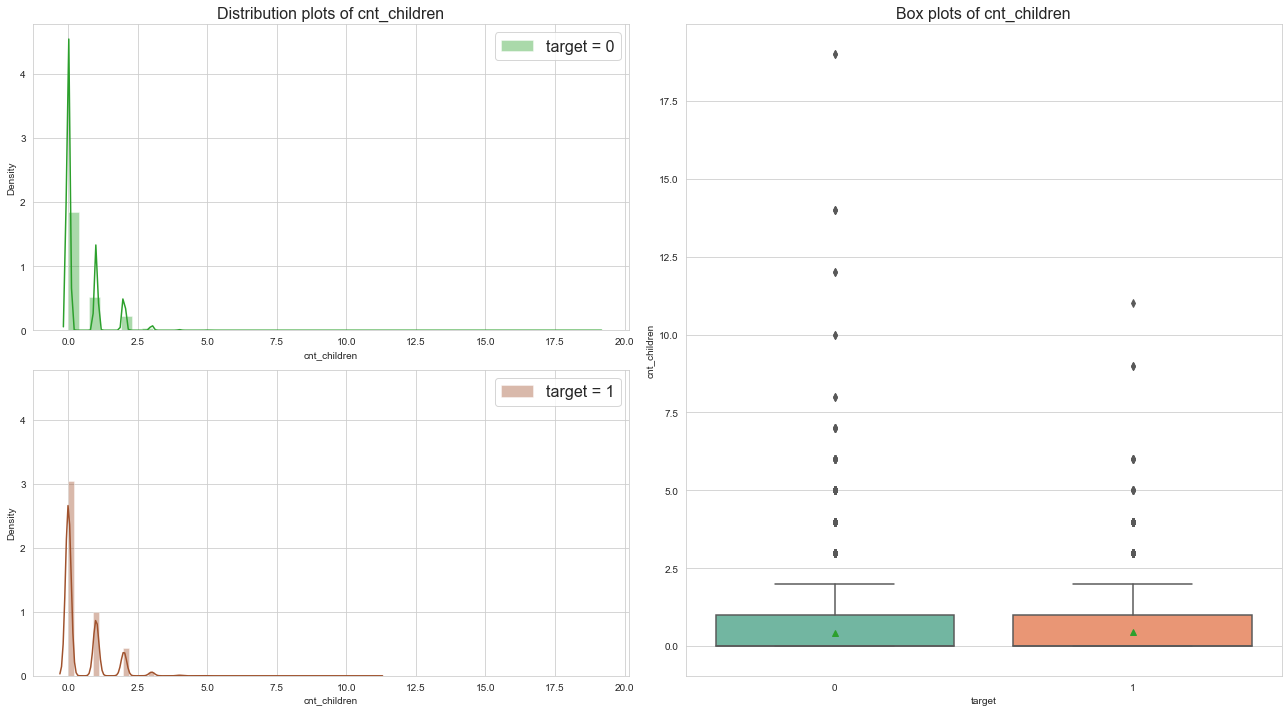

In [172]:
#Number of children that the client has
plt.figure(figsize = [18,10])
num_plot('cnt_children')

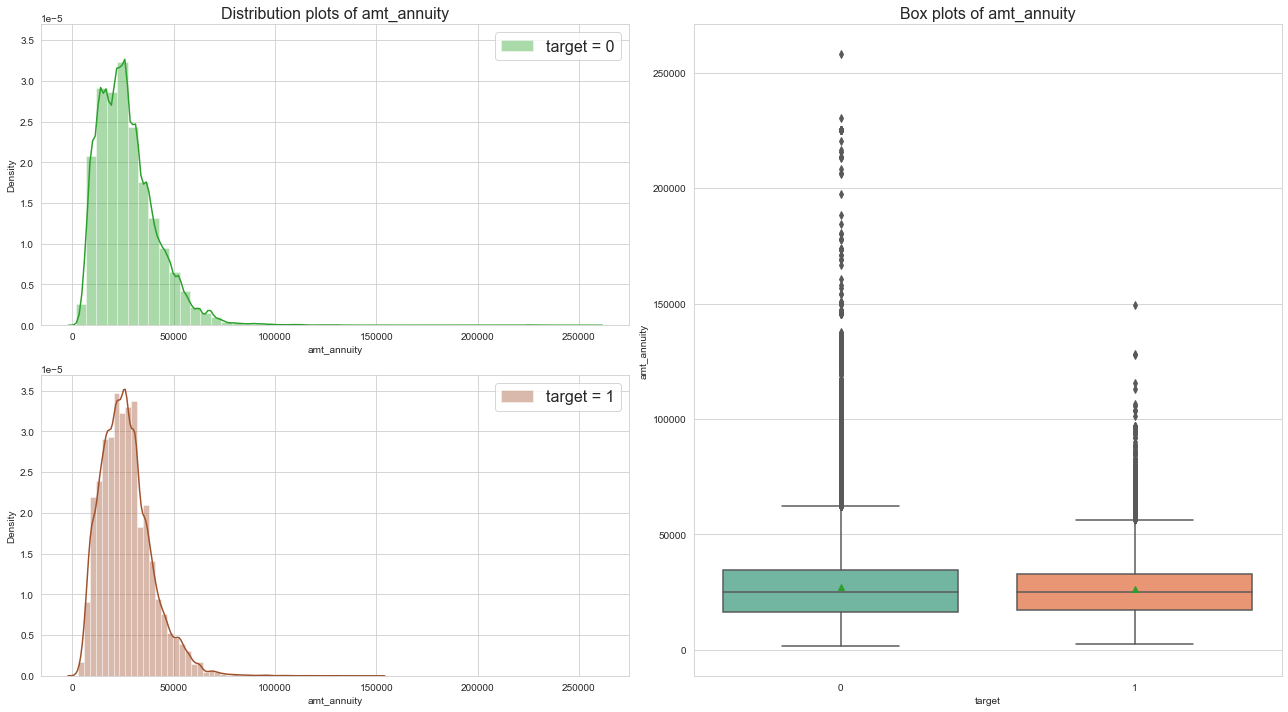

In [173]:
#phân phối xác xuất giữa số tiền trả lãi và mật độ khách hàng trong 2 trường hợp
plt.figure(figsize = [18,10])
num_plot('amt_annuity')

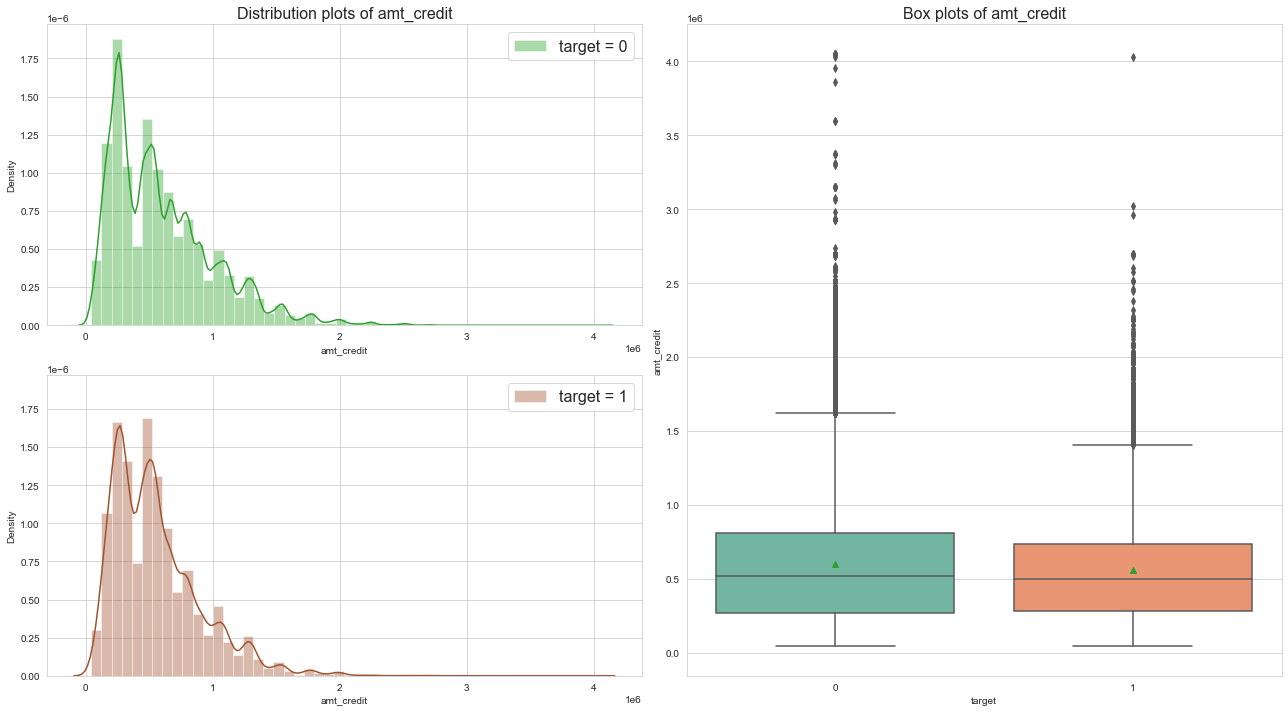

In [174]:
#phân phối xác xuất giữa số tiền đi vay và mật độ khách hàng ở 2 trường hợp
plt.figure(figsize = [18,10])
num_plot('amt_credit')

# 4. Data Modeling

In [175]:
#dropping sk_id_curr and sk_id_prev as they are useless for model
merged_data.drop(['sk_id_curr', 'sk_id_prev'], axis = 1, inplace = True)

In [176]:
merged_data.head()

,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_group,income_group,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,name_contract_status,days_decision,name_payment_type,name_client_type,name_portfolio,channel_type,sellerplace_area,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<25,high-medium,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,-606,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Approved,-746,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,-828,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,-2341,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest,3

In [177]:
new_data = merged_data.loc[merged_data['name_contract_type_x'] == 'Cash loans'].copy()
new_data.head()


,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_group,income_group,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,name_contract_status,days_decision,name_payment_type,name_client_type,name_portfolio,channel_type,sellerplace_area,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<25,high-medium,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,-606,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Approved,-746,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,-828,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,-2341,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest,3

## Preprocessing

In [178]:
#columns to be changed to category type
#cột được thay đổi thành loại danh mục
cols = ['flag_own_car','flag_own_realty','flag_mobil',
 'flag_emp_phone','flag_work_phone','flag_cont_mobile',
 'flag_phone','flag_email','region_rating_client',
 'region_rating_client_w_city','reg_region_not_live_region',
 'reg_region_not_work_region','live_region_not_work_region',
 'reg_city_not_live_city','reg_city_not_work_city','flag_document_2',
 'flag_document_3','flag_document_4','flag_document_5','flag_document_6',
 'flag_document_7','flag_document_8','flag_document_9',
 'flag_document_10','flag_document_11','flag_document_12','flag_document_13',
 'flag_document_14','flag_document_15','flag_document_16','flag_document_17',
 'flag_document_18','flag_document_19','flag_document_20','flag_document_21',
 'nflag_insured_on_approval']
new_data[cols] = new_data[cols].astype('category')

In [179]:
#Đoạn code này được sử dụng để thực hiện tiền xử lý dữ liệu trước khi chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.
cat_cols = [col for col in new_data.select_dtypes(include = ['object', 'category']).columns]
num_cols = [col for col in new_data.select_dtypes(include = np.number).columns if col != 'target']# lọc các cột có kiểu dữ liệu là số.

In [180]:
cat_cols

['name_contract_type_x',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite_x',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'occupation_type',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start_x',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'organization_type',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 'flag_document_12',
 'flag_document_13',
 'flag_document_14',
 'flag_document_15',
 'flag_document_16',
 'flag_document_17',
 'flag_document_18',
 'flag_document_19',
 'flag_document_20',
 'flag_document_21',
 'age_group',

In [181]:
num_cols

['cnt_children',
 'amt_income_total',
 'amt_credit_x',
 'amt_annuity_x',
 'amt_goods_price_x',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'cnt_fam_members',
 'hour_appr_process_start_x',
 'live_city_not_work_city',
 'ext_source_2',
 'ext_source_3',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social_circle',
 'days_last_phone_change',
 'amt_req_credit_bureau_hour',
 'amt_req_credit_bureau_day',
 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'amt_req_credit_bureau_year',
 'amt_annuity_y',
 'amt_application',
 'amt_credit_y',
 'amt_goods_price_y',
 'hour_appr_process_start_y',
 'nflag_last_appl_in_day',
 'days_decision',
 'sellerplace_area',
 'cnt_payment',
 'days_first_drawing',
 'days_first_due',
 'days_last_due_1st_version',
 'days_last_due',
 'days_termination']

In [182]:
#sử dụng phương thức "get_dummies()" của thư viện Pandas để tạo ra các biến giả (dummy variables) từ các cột trong danh sách "cat_cols".
#Biến giả được tạo ra để chuyển đổi các biến phân loại thành các giá trị nhị phân (0 hoặc 1) và giúp cho các mô hình học máy có thể xử lý dữ liệu phân loại
dummy_df = pd.get_dummies(new_data[cat_cols], drop_first = True)
dummy_df.head()

,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,flag_document_2_1,flag_document_3_1,flag_document_4_1,flag_document_5_1,flag_document_6_1,flag_document_8_1,flag_document_9_1,flag_document_11_1,flag_document_12_1,flag_document_13_1,flag_document_14_1,flag_document_15_1,flag_document_16_1,flag_document_17_1,flag_document_18_1,flag_document_19_1,flag_document_20_1,age_group_25-30,age_

In [183]:
#concatenating the dummies with merged_data and overwriting merged_data
new_data = pd.concat([new_data, dummy_df], axis = 1)
#ghép các biến giả vừa tạo vào DataFrame "merged_data" bằng phương thức "concat()" và ghi đè DataFrame gốc.

In [184]:
#dropping old catagorical columns as dummies have been created for them
new_data.drop(cat_cols, axis = 1, inplace = True)

In [185]:
new_data.head()

,target,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,

In [186]:
new_data_= new_data.sample(10000)

## 4.1 Feature Scaling

In [187]:
X = new_data_.drop('target', axis=1)
y = new_data_['target']
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, random_state=42)


In [188]:
#using standard scaler to standardise the numerical features
#Chuẩn hóa dữ liệu các cột đặc trưng kiểu số
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [189]:
X_train.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organiz

In [190]:
X_test.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organiz

In [191]:
#mean and std of numrical columns after standard scaling
X_train[num_cols].agg([np.mean, np.std]).round(2)

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [192]:
#conversion rate or defaulting rate in data
rate = y_train.mean()*100
print('Conversion rate in training data : {}%'.format(round(rate,2)))

Conversion rate in training data : 8.89%


## 4.2 Class Imbalance

In [193]:
# Kiểm tra số lượng mẫu trong mỗi lớp trước khi cân bằng
class_counts_before = new_data_['target'].value_counts()
print("Số lượng mẫu trong mỗi lớp trước khi cân bằng:")
print(class_counts_before)


Số lượng mẫu trong mỗi lớp trước khi cân bằng:
0    9101
1     899
Name: target, dtype: int64


In [194]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Chia tập dữ liệu thành features (X) và target (y)
#X = new_data_.drop('target', axis=1)
#y = new_data_['target']

# Sử dụng SMOTE để cân bằng số lượng mẫu trong mỗi lớp
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra số lượng mẫu trong mỗi lớp sau khi cân bằng
class_counts_after = pd.Series(y_resampled).value_counts()
print("Số lượng mẫu trong mỗi lớp sau khi cân bằng:")
print(class_counts_after)

Số lượng mẫu trong mỗi lớp sau khi cân bằng:
0    9101
1    9101
Name: target, dtype: int64


In [195]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [198]:
X_train.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organiz

In [199]:
X_test.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organiz

## 4.3 Model Building

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1826
           1       0.98      0.90      0.94      1815

    accuracy                           0.94      3641
   macro avg       0.95      0.94      0.94      3641
weighted avg       0.95      0.94      0.94      3641

Cohen's Kappa: 0.888463204792598


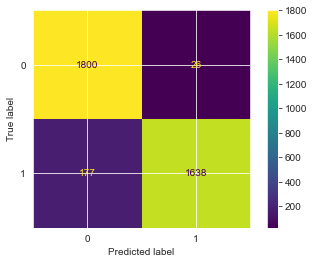

In [200]:
# XGBoost
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa}")
plot_confusion_matrix(model_xgb, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1826
           1       0.98      0.90      0.94      1815

    accuracy                           0.94      3641
   macro avg       0.94      0.94      0.94      3641
weighted avg       0.94      0.94      0.94      3641

Cohen's Kappa: 0.8785716301390556


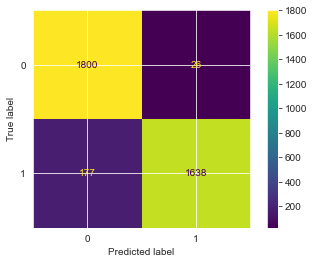

In [201]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42, n_estimators=200)
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa}")
plot_confusion_matrix(model_xgb, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1826
           1       1.00      0.90      0.95      1815

    accuracy                           0.95      3641
   macro avg       0.95      0.95      0.95      3641
weighted avg       0.95      0.95      0.95      3641

Cohen's Kappa: 0.8966995242348083


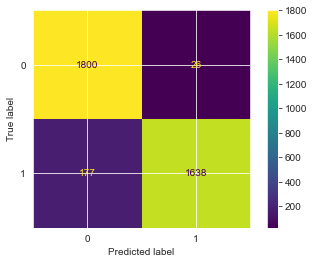

In [202]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, n_estimators=200)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa}")
plot_confusion_matrix(model_xgb, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.63      0.53      0.57      1826
           1       0.59      0.69      0.64      1815

    accuracy                           0.61      3641
   macro avg       0.61      0.61      0.60      3641
weighted avg       0.61      0.61      0.60      3641

Cohen's Kappa: 0.2154381530081293


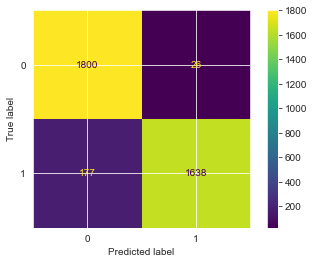

In [203]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa}")
plot_confusion_matrix(model_xgb, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1826
           1       0.86      0.89      0.87      1815

    accuracy                           0.87      3641
   macro avg       0.87      0.87      0.87      3641
weighted avg       0.87      0.87      0.87      3641

Cohen's Kappa: 0.7418602258660799


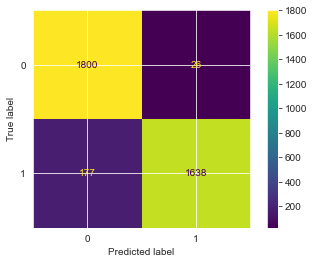

In [204]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# In bao cao ket qua
print(classification_report( y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa}")
plot_confusion_matrix(model_xgb, X_test, y_test) 